In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from findlay2025a import core

In [2]:
nb = core.get_project("seahorse")
df = pd.read_parquet(nb.get_project_file("condition_contrasts.pqt"))

In [3]:
def label_point(x, y, val, ax, **text_kwargs):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point["x"] + 0.02, point["y"], str(point["val"]), **text_kwargs)


def make_corr_plot(
    df: pd.DataFrame,
    x_var: str,
    y_var: str,
    sig_exp_lines: list[str] = [],
    trend_exp_lines: list[str] = [],
    sig_single_line: bool = False,
    trend_single_line: bool = False,
    aspect: float = 1.618,
    ht: float = 4.0,
    label_points=False,
) -> tuple[plt.Figure, plt.Axes]:
    exp_order = ["Novelty", "Locomotion", "Dual"]
    m_exp = ["o", "^", "P"]
    p_exp = sns.color_palette("Dark2_r", 8)
    exp_colors = dict(zip(exp_order, p_exp))

    fig, ax = plt.subplots(figsize=(aspect * ht, ht))
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        hue="experiment",
        hue_order=exp_order,
        palette=p_exp,
        style="experiment",
        style_order=exp_order,
        markers=m_exp,
        s=60,
        legend=False,
        ax=ax,
    )
    if label_points:
        label_point(df[x_var], df[y_var], df["subject"], ax, fontsize=6)
    if sig_single_line:
        sns.regplot(
            data=df,
            x=x_var,
            y=y_var,
            ax=ax,
            ci=False,
            robust=False,
            truncate=True,
            scatter=False,
            color="k",
            line_kws={"linewidth": 3},
        )
    if trend_single_line:
        sns.regplot(
            data=df,
            x=x_var,
            y=y_var,
            ax=ax,
            ci=False,
            robust=False,
            truncate=True,
            scatter=False,
            color="k",
            line_kws={"linewidth": 3, "ls": "--"},
        )
    alpha = 0.33 if (sig_single_line) or (trend_single_line) else 1.0
    for exp in sig_exp_lines:
        sns.regplot(
            data=df.loc[df["experiment"] == exp],
            x=x_var,
            y=y_var,
            ax=ax,
            ci=False,
            robust=False,
            truncate=True,
            scatter=False,
            color=exp_colors[exp],
            line_kws={"alpha": alpha},
        )
    for exp in trend_exp_lines:
        sns.regplot(
            data=df.loc[df["experiment"] == exp],
            x=x_var,
            y=y_var,
            ax=ax,
            ci=False,
            robust=False,
            truncate=True,
            scatter=False,
            color=exp_colors[exp],
            line_kws={"ls": "--", "alpha": alpha},
        )
    ax.spines[["top", "right"]].set_visible(False)
    return fig, ax


def strip_axes(ax: plt.Axes) -> plt.Axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

### Extended Data Figure 8B (Homeostatic rebound)
Panels indicated with (row, column)

#### Row 1 (Hippocampus vs. Cortex)

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


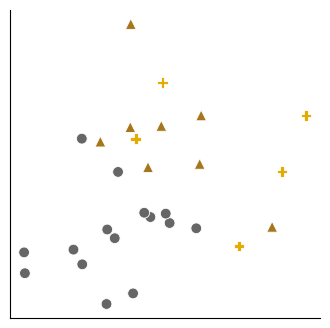

In [ ]:
# Extended Data Figure 8B, (1,1)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Rebound",
    "SPW Rate Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_spw_rate_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_spw_rate_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


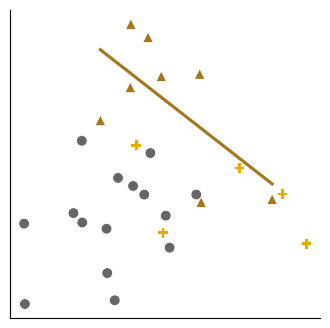

In [ ]:
# Extended Data Figure 8B, (1,2)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Rebound",
    "SPW Amplitude Rebound",
    sig_exp_lines=["Locomotion"],
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_spw_amp_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_spw_amp_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


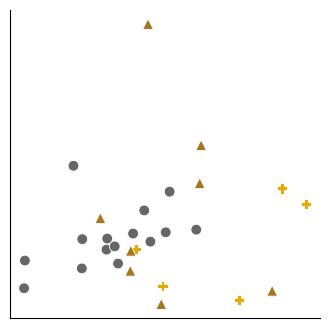

In [ ]:
# Extended Data Figure 8B, (1,3)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Rebound",
    "DSPK Amplitude Rebound",
    aspect=1.0,
    label_points=False,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


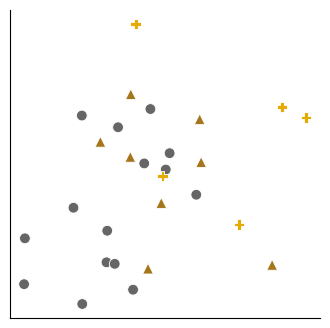

In [ ]:
# Extended Data Figure 8B, (1,4)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Rebound",
    "Ripple Rate Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


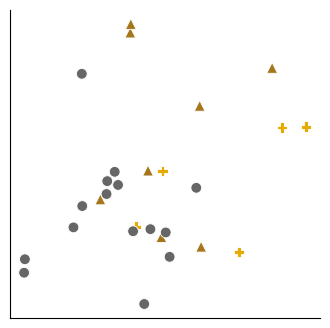

In [ ]:
# Extended Data Figure 8B, (1,5)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Rebound",
    "Ripple Frequency Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

#### Row 2 (Dentate Spikes vs. SPW-R)

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


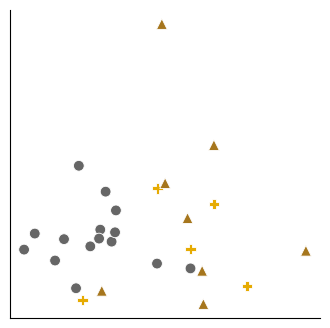

In [ ]:
# Extended Data Figure 8B, (2,1)
fig, ax = make_corr_plot(
    df,
    "SPW Rate Rebound",
    "DSPK Amplitude Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_spw_rate.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_spw_rate.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


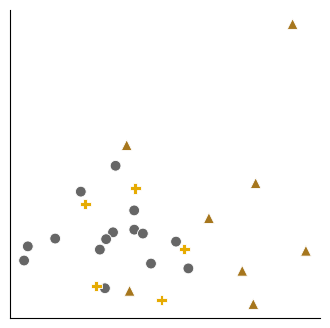

In [ ]:
# Extended Data Figure 8B, (2,2)
fig, ax = make_corr_plot(
    df,
    "SPW Amplitude Rebound",
    "DSPK Amplitude Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_spw_amp.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amo_vs_spw_amp.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


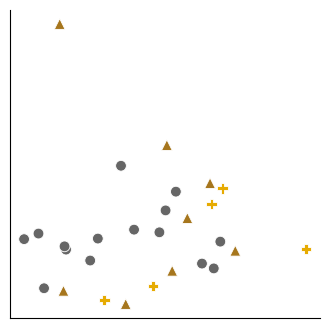

In [ ]:
# Extended Data Figure 8B, (2,3)
fig, ax = make_corr_plot(
    df,
    "Ripple Rate Rebound",
    "DSPK Amplitude Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_ripple_rate.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_ripple_rate.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


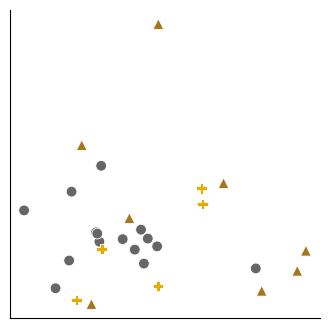

In [ ]:
# Extended Data Figure 8B, (2,4)
fig, ax = make_corr_plot(
    df,
    "Ripple Frequency Rebound",
    "DSPK Amplitude Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_ripple_freq.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_dspk_amp_vs_ripple_freq.png"), dpi=600, bbox_inches="tight")

#### Row 3 (Ripples vs. SPW)

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


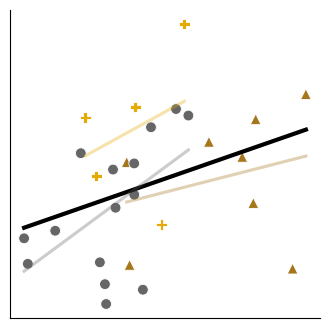

In [ ]:
# Extended Data Figure 8B, (3,1)
fig, ax = make_corr_plot(
    df,
    "SPW Amplitude Rebound",
    "Ripple Rate Rebound",
    sig_exp_lines=["Novelty", "Locomotion", "Dual"],
    sig_single_line=True,
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_spw_amp.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_spw_amp.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


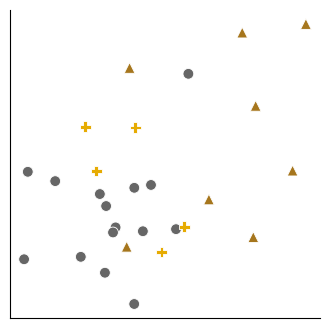

In [ ]:
# Extended Data Fig. 8B (3,2)
fig, ax = make_corr_plot(
    df,
    "SPW Amplitude Rebound",
    "Ripple Frequency Rebound",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_spw_amp.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_spw_amp.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


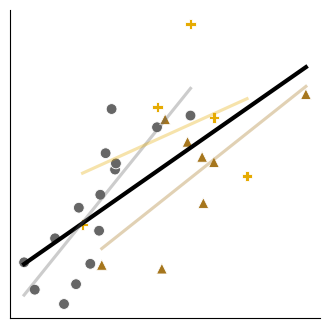

In [ ]:
# Extended Data Figure 8B, (3,3)
fig, ax = make_corr_plot(
    df,
    "SPW Rate Rebound",
    "Ripple Rate Rebound",
    sig_exp_lines=["Novelty", "Locomotion", "Dual"],
    sig_single_line=True,
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_spw_rate.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_rate_vs_spw_rate.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


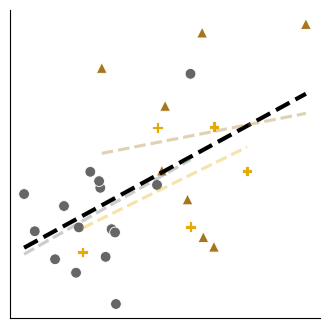

In [ ]:
# Extended Data Fig. 8B (3,4)
fig, ax = make_corr_plot(
    df,
    "SPW Rate Rebound",
    "Ripple Frequency Rebound",
    trend_exp_lines=["Novelty", "Locomotion", "Dual"],
    trend_single_line=True,
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_spw_rate.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/rebound_ripple_freq_vs_spw_rate.png"), dpi=600, bbox_inches="tight")

### Extended Data Figure 8C (Hemeostatic decline)

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


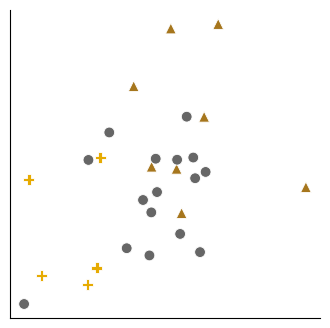

In [ ]:
# Extended Data Figure 8C, (1,1)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Decline",
    "SPW Rate Decline",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/decline_spw_rate_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/decline_spw_rate_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


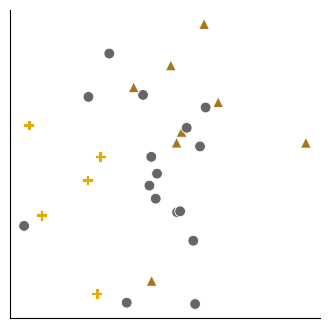

In [ ]:
# Extended Data Figure 8C, (1,2)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Decline",
    "SPW Amplitude Decline",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/decline_spw_amp_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/decline_spw_amp_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


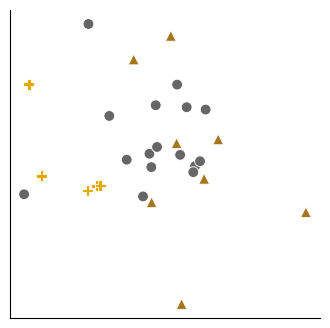

In [ ]:
# Extended Data Figure 8C, (1,3)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Decline",
    "Ripple Rate Decline",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/decline_ripple_rate_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/decline_ripple_rate_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


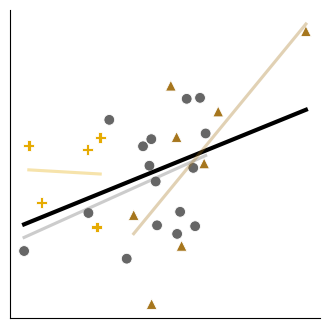

In [ ]:
# Extended Data Figure 8C, (1,4)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Decline",
    "Ripple Frequency Decline",
    sig_exp_lines=["Novelty", "Locomotion", "Dual"],
    sig_single_line=True,
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/decline_ripple_freq_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/decline_ripple_freq_vs_cx_swa.png"), dpi=600, bbox_inches="tight")

/tmp/ipykernel_1112043/3145594196.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


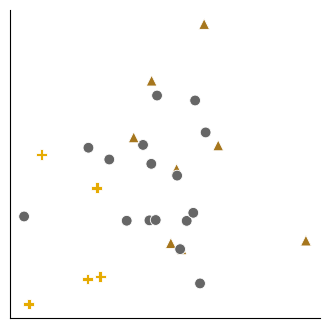

In [ ]:
# Extended Data Figure 8C, (1,5)
fig, ax = make_corr_plot(
    df,
    "Cortical SWA Decline",
    "DSPK Amplitude Decline",
    aspect=1.0,
)
ax = strip_axes(ax)
# fig.savefig(nb.get_project_file("figures/decline_dspk_rate_vs_cx_swa.svg"), bbox_inches="tight")
# fig.savefig(nb.get_project_file("figures/decline_dspk_rate_vs_cx_swa.png"), dpi=600, bbox_inches="tight")